# Inicio Scraping web Ultima Hora

Recoger el código de la web de Ultima Hora

In [106]:
import requests

In [107]:
url = 'https://www.ultimahora.es/noticias/local.html'

In [108]:
ultimahora = requests.get(url)
ultimahora

<Response [200]>

# Parsear con BeautifulSoup

In [109]:
from bs4 import BeautifulSoup

In [110]:
soup = BeautifulSoup(ultimahora.text, 'lxml')

Elegimos la zona donde se desarrollan todas las noticias locales. Crear una lista y dentro estará los links.

In [111]:
def enlaces(tag,atr01,atr02):
    lista_enlaces = []
    zona = soup.find(tag, attrs={atr01:atr02}).find_all('a')
    for link in zona:
        lista_enlaces.append(f'https://www.ultimahora.es{link.get("href")}')
    
    return lista_enlaces

In [112]:
enlaces_web = enlaces('section','role','main')

Vamos a recoger un enlace concreto a un artículo

In [113]:
articulo = enlaces_web[2]

In [114]:
try:
    # recoger el html del artículo
    html = requests.get(articulo)
    # si el code devuelto es 200 entramos con BeautifulSoup
    if html.status_code == 200:
        noticia = BeautifulSoup(html.text, 'lxml')
        # Extraer titulo de la noticia
        titulo = noticia.find('h1', attrs={'itemprop':'headline'})
        print(titulo.text)
        
        # Extraer fecha de la noticia
        fecha = noticia.find('time', attrs={'itemprop':'datePublished'}).get('datetime')
        print(fecha)
    
except Exception as error:
    print('ERROR: ')
    print(error)
    print('\n')

Dos nuevos casos elevan a cinco los afectados por coronavirus en Mallorca
2020-03-04


In [115]:
media = noticia.find('figure', attrs={'id':'fotografia_wrapper'}).find_all('img')

In [116]:
if len(media) == 0:
    print('No hay imagenes')
else:
    imagen = media[-1]
    img_src = imagen.get('src')
    print(img_src)

https://uh.gsstatic.es/sfAttachPlugin/getCachedContent/id/1012451/width/515/height/290


In [117]:
img_correcto = requests.get(img_src)
img_correcto

<Response [200]>

In [118]:
from IPython.display import Image

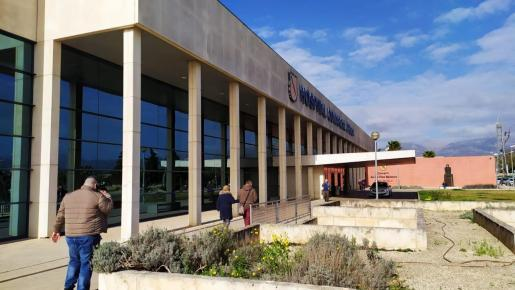

In [119]:
Image(img_correcto.content)

# Ejercicio

Crear una función donde nos scrapee una nota cada vez que la llamemos a la función. Scrapear para Ultima Hora.

In [120]:
def recolectar_noticia(articulo):
    
    # Crear diccionario vacio para poblarlo con la información
    noticias_dic = {}
    
    # recoger el html del artículo
    html = requests.get(articulo)
    
    # si el code devuelto es 200 entramos con BeautifulSoup
    if html.status_code == 200:
        noticia = BeautifulSoup(html.text, 'lxml')
        
        # Extraer titulo de la noticia
        titulo = noticia.find('h1', attrs={'itemprop':'headline'})
        if titulo:
            noticias_dic['titulo'] = titulo.text
        else:
            noticias_dic['titulo'] = None
            
        # Extraer fecha de la noticia
        fecha = noticia.find('time', attrs={'itemprop':'datePublished'}).get('datetime')
        if fecha:
            noticias_dic['fecha'] = fecha
        else:
            noticias_dic['fecha'] = None
            
        # Extraer imagen de la noticia
        media = noticia.find('figure', attrs={'id':'fotografia_wrapper'})
        if media:
            imagenes = media.find_all('img')
            if len(imagenes) == 0:
                print('No hay imagenes')
            else:
                imagen = imagenes[-1]
                img_src = imagen.get('src')
                try:
                    img_req = requests.get(img_src)
                    if img_req.status_code == 200:
                        noticias_dic['imagen'] = img_req.content
                    else:
                        noticias_dic['imagen'] = None
                except:
                    print('No se puedo obtener la imagen')
        else:
            print('No se encontro media')
    
    return noticias_dic
    

In [125]:
recolectar_noticia(articulo)

{'titulo': 'Dos nuevos casos elevan a cinco los afectados por coronavirus en Mallorca',
 'fecha': '2020-03-04',
 'imagen': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 75\n\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01"\x02\x03\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz